In [ ]:
# Plot all results new6b final: 10K nomix, 1M mix

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import seaborn as sns
import numpy as np

import torch, pickle, string
from torchvision import transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

/root/.virtualenvs/torchenv/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/root/.virtualenvs/torchenv/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
seed=25
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
def tsneplot2(xx, yy, noclasses, subyy=None, legend_names = [], title='', savefile='', ppflag=False, \
              fontsize=10, psize=(5,3), lcol=1, annote=False, subannote=False, subclasses=[]):
    plt.figure(figsize=psize)
    #xx = xx.reshape(xx.shape[0], -1)
    shp=xx.shape[-1]
    xx = xx.reshape(-1,shp)
    arr = yy.numpy()

    #perplexity=xx.shape[0]//3
    
    if ppflag:
        perplexity=int(np.sqrt(xx.shape[0]))  #xx.shape[0]
        n_iter=1000
    else:
        perplexity=40  #xx.shape[0]//3
        n_iter=400
    tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=400)
    tsne_results = tsne.fit_transform(xx.numpy())
    
    #print(f'--->>{tsne_results.shape}, {arr.shape}')
    if subyy is not None:
        sarr=subyy.numpy()
        data1 = np.append(tsne_results,arr.reshape(-1,1),axis=1)
        data = np.append(data1, sarr.reshape(-1,1), axis=1)
        df_subset = pd.DataFrame(data, columns=['tsne-2d-one','tsne-2d-two', 'y','suby' ])
    else:
    
        df_subset = pd.DataFrame(data = np.append(tsne_results,arr.reshape(-1,1) , \
                                              axis=1), columns=['tsne-2d-one','tsne-2d-two', 'y' ])
    
    x="tsne-2d-one"
    y="tsne-2d-two"
    hue="y"
    sclass="suby"
    
    #fig = plt.figure(1)
    
    g = sns.scatterplot(
        x=x, y=y,
        hue=hue, 
        palette = sns.color_palette("bright", n_colors=noclasses),
        
        data=df_subset,
        legend="brief",
        alpha=0.6
    ) 
    
    if annote:
        for i, lbl in enumerate(legend_names):
            plt.annotate(lbl, 
                         df_subset.loc[df_subset[hue]==i,[x,y]].mean(),
                         textcoords="offset points",
                         xytext=(0,-10),
                         ha='center',
                         size=10, weight='bold',
                         color='blue',
                         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
                        ) 
            
    if subannote:
        for i, lbl in enumerate(subclasses):
            plt.annotate(lbl, 
                         df_subset.loc[df_subset[sclass]==i,[x,y]].mean(),
                         textcoords="offset points",
                         xytext=(0,-10),
                         ha='center',
                         size=fontsize, weight='bold',
                         color='blue',
                         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
                         
                        ) 
            
    ha,lb = g.get_legend_handles_labels()
    lgd=plt.legend(ha, legend_names, loc='upper left', bbox_to_anchor=(1, 1),ncol=lcol)

    plt.title(title, fontsize=fontsize)
    
    if not savefile=='':
        plt.savefig(savefile,bbox_extra_artists=(lgd,), bbox_inches='tight')
       
    plt.show()
    
#mtyp 'Mix', 'noMix'
def plot_new6b_tsne(selangs,mtyp,subplot=True,stagemsg='',savefn=''):
    ldata=lmixall if mtyp=='Mix' else lnomixall
    yy=labels; classes=len(selangs)

    if layer==0:
        msg='tSNE Plot'
        mtyp='Input'
    else:
        msg=f'tSNE Plot'
    title=f'{mtyp} {msg} for Layer-{layer} for English accents\n{stagemsg}'
    if layer==0 or (not subplot):
        tsneplot2(ldata,yy,classes, title=title,legend_names=selangs,psize=(10,6), fontsize=15, \
                  ppflag=True,savefile=savefn)
    else:
        tsneplot2(ldata,yy,classes,subyy=lbls_all, title=title,legend_names=selangs,psize=(10,6), fontsize=15, \
                  ppflag=True, subannote=True, subclasses=lstchars,savefile=savefn)

In [4]:
def plotscatter(xx,yy,noclasses,legend_names = [], title='', savefile='', ppflag=False, fontsize=10, psize=(5,3), \
           XL='X', YL='Y',lcol=1):  # xx - 2D data, yy - labels 
    plt.figure(figsize=psize)
    if ppflag:
        perplexity=int(np.sqrt(xx.shape[0]))  #xx.shape[0]
        n_iter=1000
    else:
        perplexity=40  #xx.shape[0]//3
        n_iter=400
        
    shp=xx.shape[-1]
    xx = xx.reshape(-1,shp)
    arr = yy.numpy()

    df = pd.DataFrame(data = np.append(xx,arr.reshape(-1,1) , axis=1), columns=[XL,YL, 'class' ])
    
    x=XL
    y=YL
    hue="class"
    
    g = sns.scatterplot(
        x=x, y=y,
        hue=hue, 
        palette = sns.color_palette("bright", n_colors=noclasses),
        
        data=df,
        legend="brief",
        alpha=0.6
    )
    ha,lb = g.get_legend_handles_labels()
    lgd=plt.legend(ha, legend_names, loc='upper left', bbox_to_anchor=(1, 1),ncol=lcol)

    plt.title(title, fontsize=fontsize)
    plt.xlabel(XL,fontsize=fontsize)
    plt.ylabel(YL,fontsize=fontsize)
    
    
    if not savefile=='':
        plt.savefig(savefile,bbox_extra_artists=(lgd,), bbox_inches='tight')
       
    plt.show()
    
    

# Plot for Indic Timit data

In [6]:
from dataloader_chars_indic_timit import Dataloader_chars_indic_timit
from dataloader_chars_indic_timit import stackup_inputs, collate_wrapper
from dataloader_chars_indic_timit import device

## SVD 

In [3]:
setup='w2v2large960h_new6b'
EVAL_LANG='HIN'
modeltypes=['mix','nomix']
alldata={}
for modeltype in modeltypes:
    spe='1000K' if modeltype=='mix' else '10K_best'
    taps_file=f'pkldata_new6b/train_taps_{spe}_new6b_HIN_{modeltype}.pkl'
    with open(taps_file,'rb') as f:
        alldata[modeltype]=pickle.load(f)

In [4]:
layers=[0,7]  #[0,1,2,3,4,5,6,7,8]

ldata={}
for modeltype in modeltypes:
    ldata[modeltype]={}
    for layer in layers:
        ldata[modeltype][layer]=alldata[modeltype][layer].detach().cpu()

In [5]:
feats={}
for modeltype in modeltypes:
    feats[modeltype]={}
    for layer in layers:
        feats[modeltype][layer]=np.matmul(ldata[modeltype][layer].T,ldata[modeltype][layer])
        

In [6]:
Svals={}
for modeltype in modeltypes:
    Svals[modeltype]={}
    for layer in layers:
        _,Svals[modeltype][layer],_ = np.linalg.svd(ldata[modeltype][layer])

In [22]:
Svals['mix'][0].shape[0]

675

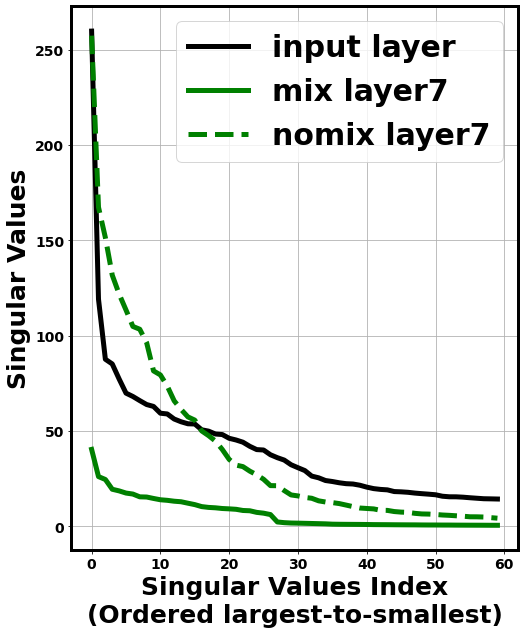

In [70]:
fig=plt.figure(figsize=[8,10]) 
ax = fig.gca()
#plt.title(f'Stage1 Model - Singular values of Representations\nfor layers: {layers}',fontsize=20)
plt.xlabel("Singular Values Index\n(Ordered largest-to-smallest)",fontsize=25, weight='bold')
plt.ylabel("Singular Values",fontsize=25, weight='bold')

clrs=['k','g','r','b','y','c']
cutoff=min(60,Svals['mix'][0].shape[0])
yindex_cutoff=0 #1
#cutoff-=yindex_cutoff
#x=np.arange(cutoff)
x=np.arange(cutoff-yindex_cutoff)
plt.plot(x,Svals['mix'][0][yindex_cutoff:cutoff],c=clrs[0],label=f'input layer', linewidth=5)

lsty=['-','--']
for i,layer in enumerate(layers):
    if i==0: continue
    cutoff=min(60,Svals['mix'][layer].shape[0])
    #x=np.arange(cutoff)
    x=np.arange(cutoff-yindex_cutoff)
    plt.plot(x,Svals['mix'][layer][yindex_cutoff:cutoff],c=clrs[i],label=f'mix layer{layer}', linewidth=5)
    plt.plot(x,Svals['nomix'][layer][yindex_cutoff:cutoff],c=clrs[i],linestyle="--",label=f'nomix layer{layer}', linewidth=5)

#leg=plt.legend()  
legend_properties = {'weight':'bold', 'size':30}
leg=plt.legend(prop=legend_properties)
# for line in leg.get_lines():
#     line.set_linewidth(2)
# for text in leg.get_texts():
#     text.set_fontsize('x-large')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(3)
plt.grid()
savefile='plots_final/SVD_0_7.png'
plt.savefig(savefile,bbox_extra_artists=(leg,), bbox_inches='tight')

plt.show()

## Distribution Drift

In [3]:
def mmd_linear(X, Y):
    delta = X.mean(0) - Y.mean(0)
    return delta.dot(delta.T)

def mmd_category(x,y):
    ldim=x.shape[-1]
    x1=x.contiguous().view(-1,25,ldim);y1=y.contiguous().view(-1,25,ldim)
    cdim=x1.shape[0]
    a=[]
    for i in range(cdim):
        a.append(mmd_linear(x1[i],y1[i]))
    a=torch.vstack(a)/ldim
    return a.mean()

In [4]:
EVAL_LANGS = ['HIN', 'TAM', 'BEN', 'MLY', 'MAR', 'KAN']
modeltypes=['mix','nomix']
setup='w2v2large960h_new6b'

In [5]:
allmmds=[]
for modeltype in modeltypes:
    inpdata=[]
    outdata=[]
    for EVAL_LANG in EVAL_LANGS:
        spe='1000K' if modeltype=='mix' else '10K_best'
        taps_file=f'pkldata_new6b/test_taps_{spe}_new6b_{EVAL_LANG}_{modeltype}.pkl'
        with open(taps_file,'rb') as f:
            alldata=pickle.load(f)
        
        inpdata.append(alldata[0])
        outdata.append(alldata[-2])

    data=[inpdata,outdata]
    rows=2;cols=len(EVAL_LANGS)
    mmds=torch.zeros((rows,cols))
    for row,dist in enumerate(data):
        x=dist[0].detach().cpu() # HIN test data
        #x=hin_data[modeltype][row].detach().cpu() # HIN train data
        for col,inp in enumerate(dist):
            y=inp.detach().cpu()
            mmds[row,col]=mmd_category(x,y)
    allmmds.append(mmds)
    
allmmds[1]=allmmds[1][1].unsqueeze(0)
allmmds=torch.vstack(allmmds)

/tmp/ipykernel_18802/2465241113.py:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  return delta.dot(delta.T)


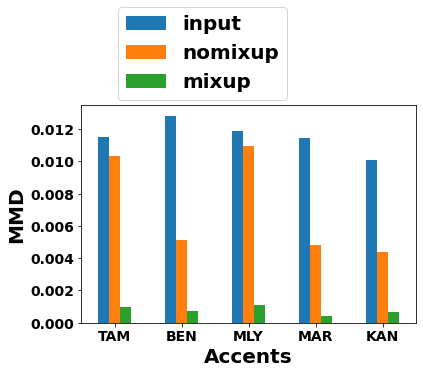

In [6]:
# df_mmds_all = pd.DataFrame({'input':allmmds[0,1:],'nomixout':allmmds[2,1:], 'mixout':allmmds[1,1:]}, index=EVAL_LANGS[1:])
df_mmds_all = pd.DataFrame({'input':allmmds[0,1:],'nomixup':allmmds[2,1:], 'mixup':allmmds[1,1:]}, index=EVAL_LANGS[1:])
title=f'Stage1 - MMDs between HIN test and other\nIndic Timit test accents' #\n{setup}'
ax = df_mmds_all.plot.bar(rot=0, fontsize=15)
ax.set_ylabel('MMD',fontdict={'fontsize':20, 'weight':'bold'})
ax.set_xlabel('Accents',fontdict={'fontsize':20,'weight':'bold'})
legend_properties = {'weight':'bold', 'size':20}
leg=plt.legend(bbox_to_anchor=(.08, .98),  prop=legend_properties)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
#ax.set_title(title,fontdict={'fontsize':15})
savefile='plots_final/MMD.png'
plt.savefig(savefile,bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

## tsne plots

In [182]:
langs = ['HIN', 'TAM', 'BEN', 'MLY', 'MAR', 'KAN']
modeltypes=['mix','nomix']
#lstchars=['|']+list(string.ascii_lowercase)
lstchars=list(string.ascii_lowercase)+['|']
chmap=dict([(k,v) for v,k in enumerate(lstchars)])
classes=27
kshot=25
setup='w2v2large960h_new6b'

In [183]:
tap_nomix_pkls={}
tap_mix_pkls={}
execdir='/root/manifold/experiments/new6b'
for lang in langs:
    tap_nomix_pkls[lang]=f'pkldata_new6b/test_taps_10K_best_new6b_{lang}_nomix.pkl'
    tap_mix_pkls[lang]=f'pkldata_new6b/test_taps_1000K_new6b_{lang}_mix.pkl'
    

In [184]:
taps_data_mix={}
taps_data_nomix={}
for lang in langs:
    with open(tap_nomix_pkls[lang],'rb') as f1, open(tap_mix_pkls[lang],'rb') as f2:
        taps_data_nomix[lang]=pickle.load(f1)
        taps_data_mix[lang]=pickle.load(f2)

labels=torch.nn.functional.one_hot(torch.arange(0, classes, 1 / kshot).long())
lbls=torch.argmax(labels,dim=1).cpu()
lbls_class=lbls.contiguous().view(27,-1)

taps_mix=taps_data_mix
taps_nomix=taps_data_nomix
    
lbls_all=[lbls_class]*len(langs)
lbls_all=torch.stack(lbls_all)
lbls_all=lbls_all.contiguous().view(-1)


In [187]:
numlayers=len(taps_mix['HIN'])
for i in range(numlayers):
    print(f'Layer {i} -> {taps_mix["HIN"][i].shape}')
print(f'Num layers: {numlayers}')

Layer 0 -> torch.Size([675, 1024])
Layer 1 -> torch.Size([675, 512])
Layer 2 -> torch.Size([675, 128])
Layer 3 -> torch.Size([675, 32])
Layer 4 -> torch.Size([675, 2])
Layer 5 -> torch.Size([675, 32])
Layer 6 -> torch.Size([675, 128])
Layer 7 -> torch.Size([675, 512])
Layer 8 -> torch.Size([675, 27])
Num layers: 9


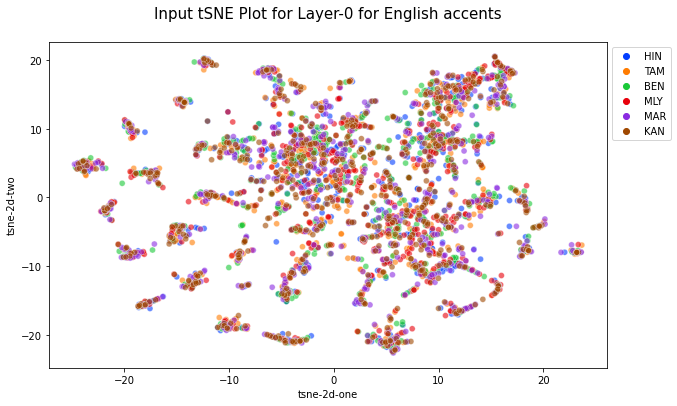

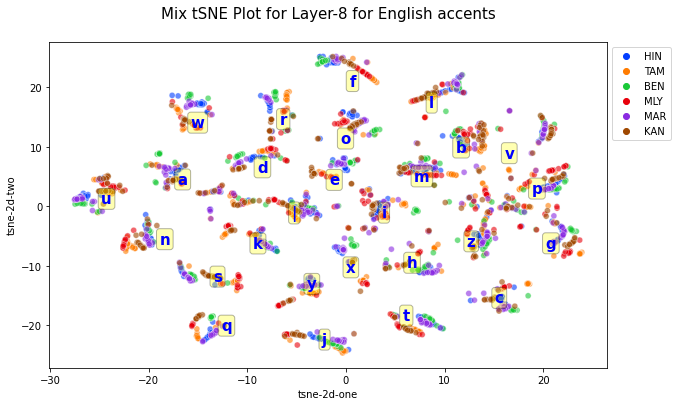

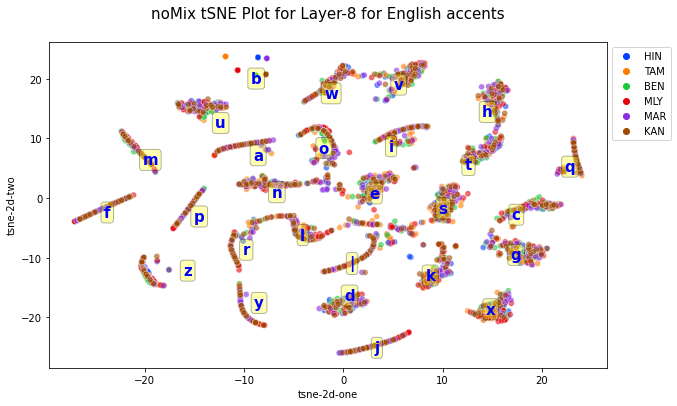

In [188]:

for mtyp in ['Mix','noMix']:
    for layer in range(numlayers):
        lmix={}
        lnomix={}
        ldim=taps_mix[langs[0]][layer].shape[1]
        for lang in langs:
            lmix[lang]=taps_mix[lang][layer].contiguous().view(27,25,ldim).cpu()
            lnomix[lang]=taps_nomix[lang][layer].contiguous().view(27,25,ldim).cpu()

        for lang in langs:
            lmix[lang]=lmix[lang].contiguous().view(-1,ldim)
            lnomix[lang]=lnomix[lang].contiguous().view(-1,ldim)

        samples=lmix[langs[0]].shape[0]
        labels=torch.tensor([[i]*samples for i in range(len(langs))]).contiguous().view(-1)
        labels_class=lbls_all
        lmixall=torch.stack([lmix[l] for l in langs])
        lnomixall=torch.stack([lnomix[l] for l in langs])

        if mtyp=='noMix' and layer==0: continue
        if layer in [0,8]:
            savefn=f'plots_final/tsne_stage1_{mtyp}_layer{layer}_new6b.png'
        else:
            continue
            #savefn=''
        plot_new6b_tsne(mtyp=mtyp,selangs=langs,savefn=savefn)

## Bottleneck Layer scatter plots

In [97]:
lstchars=list(string.ascii_lowercase)+['|']
lang='HIN'
layer=4
lmix=taps_mix[lang][layer]
ldim=lmix.shape[1]
lmix=lmix.contiguous().view(27,25,ldim).cpu()

lmix.shape, lbls.shape

(torch.Size([27, 25, 2]), torch.Size([675]))

In [17]:
lnomix=taps_nomix[lang][layer]
lnomix=lnomix.contiguous().view(27,25,ldim).cpu()

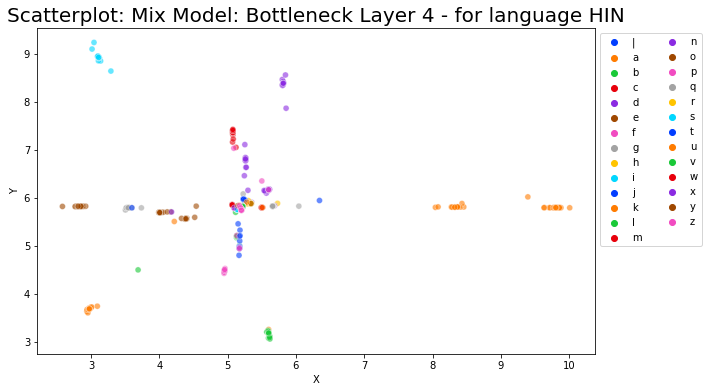

In [22]:
x=lmix;y=lbls;classes=lmix.shape[0]
title=f'Scatterplot: Mix Model: Bottleneck Layer {layer} - for language {lang}'
plotscatter(x,y,classes,title=title,legend_names=lstchars,psize=(10,6),lcol=2, fontsize=20)

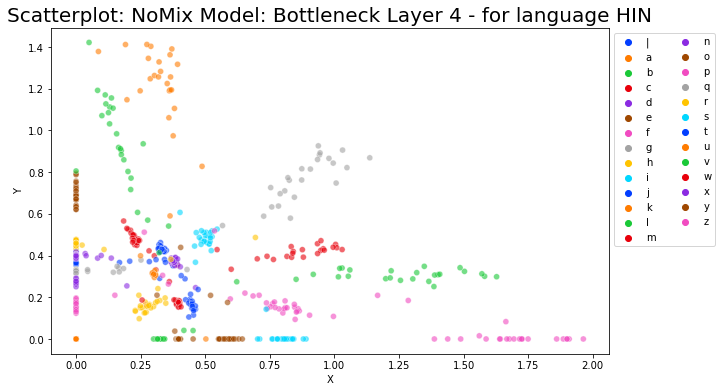

In [23]:
x=lnomix;y=lbls;classes=lnomix.shape[0]
title=f'Scatterplot: NoMix Model: Bottleneck Layer {layer} - for language {lang}'
plotscatter(x,y,classes,title=title,legend_names=lstchars,psize=(10,6),lcol=2, fontsize=20)

## Bottleneck layer for specific chars

In [130]:
allchars=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|']
selchars=['a','p','b','s','l','n']
lstchars=list(string.ascii_lowercase)+['|']
lang='HIN'
layer=4


In [131]:
lmix=taps_mix[lang][layer]
ldim=lmix.shape[1]
lmix=lmix.contiguous().view(27,25,ldim).cpu()
lnomix=taps_nomix[lang][layer]
lnomix=lnomix.contiguous().view(27,25,ldim).cpu()

In [132]:
sel_lmix=[]
for selchar in selchars:
    slm=lmix[allchars.index(selchar)]
    sel_lmix.append(slm)
sel_lmix=torch.stack(sel_lmix)
sel_lnomix=[]
for selchar in selchars:
    slm=lnomix[allchars.index(selchar)]
    sel_lnomix.append(slm)
sel_lnomix=torch.stack(sel_lnomix)

In [133]:
sel_lmix.shape,sel_lnomix.shape

(torch.Size([6, 25, 2]), torch.Size([6, 25, 2]))

In [134]:
lbls=[torch.tensor([i]*25) for i in range(sel_lmix.shape[0])]

In [135]:
lbls=torch.stack(lbls).contiguous().view(-1)
lbls.shape

torch.Size([150])

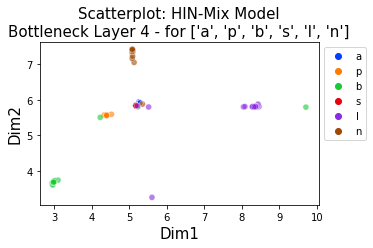

In [138]:
x=sel_lmix;y=lbls;classes=sel_lmix.shape[0]
title=f'Scatterplot: HIN-Mix Model\nBottleneck Layer {layer} - for {selchars}'
sfn=f'plots_final/HIN_mix_bottleneck_selchars.png'
plotscatter(x,y,classes,title=title,legend_names=selchars, fontsize=15, XL='Dim1',YL='Dim2',savefile=sfn)

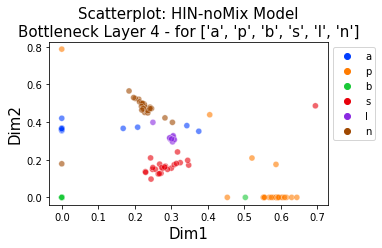

In [139]:
x=sel_lnomix;y=lbls;classes=sel_lnomix.shape[0]
title=f'Scatterplot: HIN-noMix Model\nBottleneck Layer {layer} - for {selchars}'
sfn=f'plots_final/HIN_nomix_bottleneck_selchars.png'
plotscatter(x,y,classes,title=title,legend_names=selchars, fontsize=15, XL='Dim1',YL='Dim2',savefile=sfn)

## cer plots for accents

In [35]:
csvfn='plots/inference_Stage2_HIN_new6b_nomix_best_10K.csv'
df1=pd.read_csv(csvfn)
df1.columns = ['testlang', '10K_nomix_cer']
df1

,testlang,10K_nomix_cer
0,HIN,7.12
1,TAM,10.20
2,BEN,5.03
3,MLY,7.75
4,MAR,7.02
5,KAN,8.13


In [36]:
csvfn='plots/inference_Stage2_HIN_1000K_mix_new6b.csv'
df2=pd.read_csv(csvfn)
df2=df2[['testlang','1M_cer']]
df2.columns = ['testlang', '1M_mix_cer']
df2

,testlang,1M_mix_cer
0,HIN,4.87
1,TAM,8.01
2,BEN,2.68
3,MLY,5.57
4,MAR,4.76
5,KAN,5.95


In [37]:
newd={'testlang':list(df1['testlang']), f'nomix_cer':list(df1['10K_nomix_cer']), f'mix_cer':list(df2['1M_mix_cer'])}
df3=pd.DataFrame(newd)
df3['incr']=df3.apply(lambda row: round(abs((row['mix_cer'] - row['nomix_cer'])),2), axis=1)
df3[f'cerr%'] = df3.apply(lambda row: round(abs((row['mix_cer'] - row['nomix_cer'])/row['mix_cer'])*100,2), axis=1)
df3

,testlang,nomix_cer,mix_cer,incr,cerr%
0,HIN,7.12,4.87,2.25,46.20
1,TAM,10.20,8.01,2.19,27.34
2,BEN,5.03,2.68,2.35,87.69
3,MLY,7.75,5.57,2.18,39.14
4,MAR,7.02,4.76,2.26,47.48
5,KAN,8.13,5.95,2.18,36.64


In [38]:
fbcer=[5.06,8.07,2.96,5.73,5.1,6.08]
df3['fb_cer']=fbcer

In [39]:
df3

,testlang,nomix_cer,mix_cer,incr,cerr%,fb_cer
0,HIN,7.12,4.87,2.25,46.20,5.06
1,TAM,10.20,8.01,2.19,27.34,8.07
2,BEN,5.03,2.68,2.35,87.69,2.96
3,MLY,7.75,5.57,2.18,39.14,5.73
4,MAR,7.02,4.76,2.26,47.48,5.10
5,KAN,8.13,5.95,2.18,36.64,6.08


In [40]:
df4=df3[['testlang','nomix_cer','mix_cer','fb_cer']]

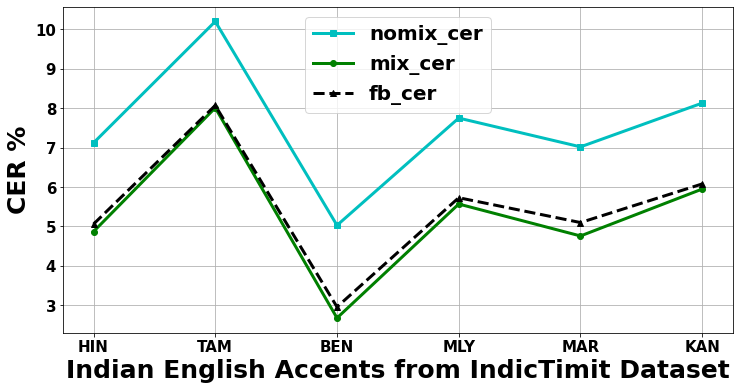

In [46]:
langs=list(df4['testlang'])
title='CER% for Mix and noMix HIN-models for test-corpus of Indic-Timit'
styles1 = ['cs-','go-','k^--']
ax=df4.plot.line(figsize=(12,6), style=styles1, linewidth=3)
plt.xticks(np.arange(len(langs)), langs, fontsize=15, weight = 'bold')
plt.yticks(fontsize=15, weight = 'bold')
ax.set_xlabel("Indian English Accents from IndicTimit Dataset", fontsize=25, weight = 'bold')
ax.set_ylabel("CER %",fontsize=25, weight = 'bold')
#ax.set_title(title,fontdict={'fontsize':20})
legend_properties = {'weight':'bold', 'size':20}
leg=plt.legend(prop=legend_properties)
plt.grid()
sfn=f'plots_final/cer_plots_indic_timit.png'
plt.savefig(fname=sfn,bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

In [10]:
csvfn='plots/inference_stage2_HIN_1000K_10K_new6b_grouped_cv1.csv'
df=pd.read_csv(csvfn)

columns_titles = ["cvgrp","nomix","mix"]
df=df.reindex(columns=columns_titles)

list_row = ["CV1-test", 15.47, 12.89]
df.loc[len(df)] = list_row

df

,cvgrp,nomix,mix
0,uk,8.04,5.31
1,oriental,13.32,10.97
2,northam,6.24,3.51
3,african,8.83,6.61
4,australian,20.08,18.05
5,CV1-test,15.47,12.89


In [11]:
df.iat[0, 0] = 'UKI'
df.iat[4, 0] = 'ANZ'
df

,cvgrp,nomix,mix
0,UKI,8.04,5.31
1,oriental,13.32,10.97
2,northam,6.24,3.51
3,african,8.83,6.61
4,ANZ,20.08,18.05
5,CV1-test,15.47,12.89


In [12]:
df.rename(columns={'nomix': 'nomix_cer', 'mix': 'mix_cer'}, inplace=True)
df

,cvgrp,nomix_cer,mix_cer
0,UKI,8.04,5.31
1,oriental,13.32,10.97
2,northam,6.24,3.51
3,african,8.83,6.61
4,ANZ,20.08,18.05
5,CV1-test,15.47,12.89


In [13]:
list(df['cvgrp'])

['UKI', 'oriental', 'northam', 'african', 'ANZ', 'CV1-test']

In [14]:
df['incr']=df.apply(lambda row: round(abs((row['mix_cer'] - row['nomix_cer'])),2), axis=1)
df[f'cerr%'] = df.apply(lambda row: round(abs((row['mix_cer'] - row['nomix_cer'])/row['mix_cer'])*100,2), axis=1)
df

,cvgrp,nomix_cer,mix_cer,incr,cerr%
0,UKI,8.04,5.31,2.73,51.41
1,oriental,13.32,10.97,2.35,21.42
2,northam,6.24,3.51,2.73,77.78
3,african,8.83,6.61,2.22,33.59
4,ANZ,20.08,18.05,2.03,11.25
5,CV1-test,15.47,12.89,2.58,20.02


In [15]:
df1=df[['cvgrp','nomix_cer','mix_cer']]
df1

,cvgrp,nomix_cer,mix_cer
0,UKI,8.04,5.31
1,oriental,13.32,10.97
2,northam,6.24,3.51
3,african,8.83,6.61
4,ANZ,20.08,18.05
5,CV1-test,15.47,12.89


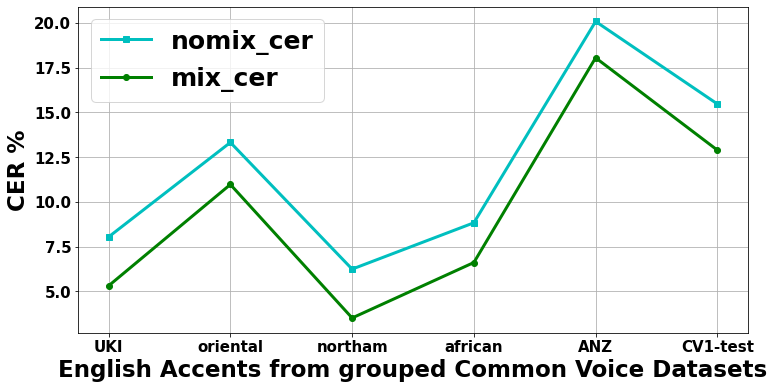

In [16]:
langs=list(df1['cvgrp'])
cvgroups={'UKI':['england','ireland'], 'oriental':['indian','malaysia'], 'northam':['us','canada'], \
         'african':['african'], 'ANZ':['australia','newzealand']}
cvgrp1="'UKI':['england','ireland'], 'oriental':['indian','malaysia'], 'northam':['us','canada']"
cvgrp2="'african':['african'], 'ANZ':['australia','newzealand']"
title=f'CER% for Mix and noMix HIN-models for Common Voice accents\n{cvgrp1}\n{cvgrp2} and CV1-test'
styles = ['cs-','go-']
ax=df1.plot.line(figsize=(12,6), style=styles, linewidth=3)

plt.yticks(fontsize=15, weight = 'bold')
plt.xticks(np.arange(len(langs)), langs, fontsize=15, weight = 'bold')
ax.set_xlabel("English Accents from grouped Common Voice Datasets", fontsize=23, weight = 'bold')
ax.set_ylabel("CER %",fontsize=23, weight = 'bold')
#plt.title(title,fontsize=18,weight = 'bold')
legend_properties = {'weight':'bold', 'size':25}
leg=plt.legend(prop=legend_properties)
plt.grid()
sfn=f'plots_final/cer_plots_commonvoice_1.png'
plt.savefig(fname=sfn,bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

## plot loss-acc for stage1 evaluation for all accents for specified nomix-spe

In [58]:
spe_nomix='10K'
csvfn=f'plots/loss_acc_inference_1000K_{spe_nomix}_best_new6b.csv'
df=pd.read_csv(csvfn)
df

,testlang,1000K_mix_loss,1000K_mix_acc,10K_nomix_loss,10K_nomix_acc
0,HIN,1.720519,92.917043,1.778072,91.060740
1,TAM,2.472302,89.204443,2.632695,87.004447
2,BEN,1.205452,95.211852,1.185256,93.697774
3,MLY,2.356377,89.893323,2.434373,87.952590
4,MAR,1.560021,93.545181,1.544503,91.946673
5,KAN,1.892299,92.099249,1.906977,90.394074


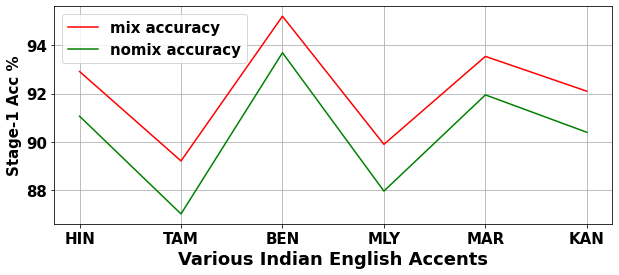

In [70]:
plt.figure(figsize=[10,4]) 
langs=list(df['testlang'])

ax=plt.subplot(111)
plt.xticks(range(6),langs, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
ax.set_xlabel("Various Indian English Accents", fontsize=18, weight='bold')
ax.set_ylabel("Stage-1 Acc %",fontsize=15, weight='bold')

df.set_index('testlang')

y3 = df['1000K_mix_acc']
y4 = df[f'{spe_nomix}_nomix_acc']

ax.plot(y3, 'r-',label='mix accuracy')
ax.plot(y4, 'g-',label='nomix accuracy')

legend_properties = {'weight':'bold', 'size':15}
leg=ax.legend(prop=legend_properties,loc='upper left')
plt.grid()
sfn=f'plots_final/Stage1_test_acc_accents_indic_timit.png'
plt.savefig(fname=sfn,bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()